In [252]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import os

In [253]:
class FeatureExtraction:
    def __init__(self, image, filters, height, width, filter_height, filter_width, num_filters, display):
        image_array = []
        for i in range(num_filters):
            image_array.append(image)
        self.image_array = image_array
        self.filters = filters
        self.height = height
        self.width = width
        self.filter_height = filter_height
        self.filter_width = filter_width
        self.num_filters = num_filters
        self.to_display = to_display
    
    def reinit(self):
        if len(self.image_array[0].shape) > 1:
            self.height, self.width = self.image_array[0].shape
        else:
            self.height, self.width = 0, 0
            
    def extract(self):
        if self.to_display:
            self.display()
        self.pad_zero(1)
        self.conv2D(1)
        self.relu()
        self.remove_pad_zero(1)
        self.max_pool(size=3, stride=2)
        
        
        if self.to_display:
            print("after conv")
            self.display()
        
        self.reinit()
        self.pad_zero(1)
        self.conv2D(1)
        self.relu()
        self.remove_pad_zero(1)
        self.max_pool(size=2, stride=2)

        if self.to_display:
            print("after conv")
            self.display()
        self.reinit()
        self.pad_zero(1)
        self.conv2D(1)
        self.relu()
        self.remove_pad_zero(1)
        self.max_pool(size=2, stride=2)
        
        
        if self.to_display:
            print("after conv")
            self.display()
        self.reinit()
        self.pad_zero(1)
        self.conv2D(1)
        self.relu()
        self.remove_pad_zero(1)
        self.max_pool(size=2, stride=1)

        if self.to_display:
            print("after conv")
            self.display()
        self.reinit()
        self.pad_zero(1)
        self.conv2D(1)
        self.relu()
        self.remove_pad_zero(1)
        self.max_pool(size=2, stride=1)
        
        if self.to_display:
            print("after conv")
            self.display()
        self.reinit()
        self.pad_zero(1)
        self.conv2D(1)
        self.relu()
        self.remove_pad_zero(1)
        self.max_pool(size=2, stride=1)
        
#         print("after conv")
#         self.display()
#         self.reinit()
#         self.pad_zero(1)
#         self.conv2D(1)
#         self.relu()
#         self.remove_pad_zero(1)
#         self.max_pool(size=2, stride=1)
        
        
        if self.to_display:
            print("after conv")
            self.display()
        print(self.image_array[0].shape)
        feature_vector = self.flatten()
        return feature_vector
    
    def pad_zero(self, number_pad):
        for n in range(self.num_filters):
            padded_image = np.zeros((1, self.height+(number_pad*2), self.width+(number_pad*2)))
            padded_image[0, number_pad:self.height+number_pad, number_pad:self.width+number_pad] = self.image_array[n]

            self.image_array[n] = padded_image[0]

    def remove_pad_zero(self, number_pad):
        for n in range(self.num_filters):
            self.image_array[n] = self.image_array[n][number_pad:self.height-number_pad, number_pad:self.width-number_pad]
    def conv2D(self, number_pad):
        s = self.filter_height*self.filter_width
        for n in range(self.num_filters):
            image_copy = self.image_array[n].copy()
            for i in range(0, self.height-number_pad-1):
                for j in range(0, self.width-number_pad-1):
                    avg = 0
                    patch = self.image_array[n][i: i+self.filter_height, j:j+self.filter_width]
                    for u in range(0, self.filter_height):
                        for v in range(0,  self.filter_width):
                            avg += patch[u, v]*self.filters[n, u, v]
                    avg = avg/s
                    image_copy[i+1, j+1] = round(avg,2)
            self.image_array[n] = image_copy
    def relu(self):
        for n in range(self.num_filters):
            for i in range(self.height):
                for j in range(self.width):
                    if self.image_array[n][i, j] < 0:
                        self.image_array[n][i, j] = 0

    def max_pool(self, size, stride):
        for n in range(self.num_filters):
            output = []
            for i in range(0, self.height-size-1, stride):
                row_list = []
                for j in range(0, self.width-size-1, stride):
                    patch = self.image_array[n][i: i+size, j:j+size]
                    ph, pw = patch.shape[:2]
                    if ph > 0 and pw > 0:
                        m = np.max(self.image_array[n][i: i+size, j:j+size])
                        row_list.append(m)
                output.append(row_list)
            self.image_array[n] = np.array(output)
    def flatten(self):
        feature_vector = []
        for n in range(self.num_filters):
            feature_vector.append(self.image_array[n].flatten())
        return feature_vector
    def display(self):
        fig=plt.figure(figsize=(15, self.num_filters))
        if self.image_array[0].shape[0] > 0 and self.image_array[1].shape[0] > 0:
            for n in range(self.num_filters):
                fig.add_subplot(1, self.num_filters, n+1)
                plt.imshow(self.image_array[n])
            plt.show()
        
            
        

In [235]:
# print("image_gray", pad_image)
filters = np.zeros((4, 3, 3))
# sobel
filters[0, :, :] = np.array([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]])
filters[1, :, :] = np.array([[1, 2, 1],[0, 0, 0], [-1, -2, -1]])
# prewitt
filters[2, :, :] = np.array([[1, 0, -1],[1, 0, -1], [1, 0, -1]])
filters[3, :, :] = np.array([[1, 1, 1],[0, 0, 0], [-1, -1, -1]])
print(filters)

[[[-1.  0.  1.]
  [-2.  0.  2.]
  [-1.  0.  1.]]

 [[ 1.  2.  1.]
  [ 0.  0.  0.]
  [-1. -2. -1.]]

 [[ 1.  0. -1.]
  [ 1.  0. -1.]
  [ 1.  0. -1.]]

 [[ 1.  1.  1.]
  [ 0.  0.  0.]
  [-1. -1. -1.]]]


In [236]:
height, width = image_gray.shape[:2]
filter_height, filter_width = 3, 3
filter_count = 4

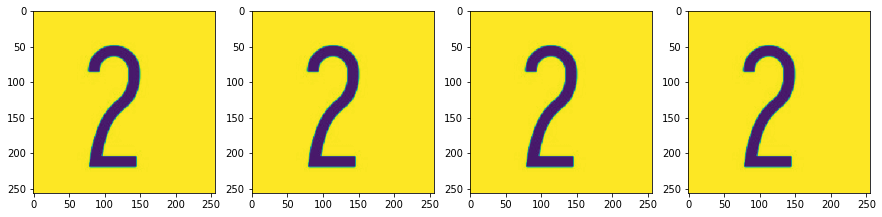

after conv


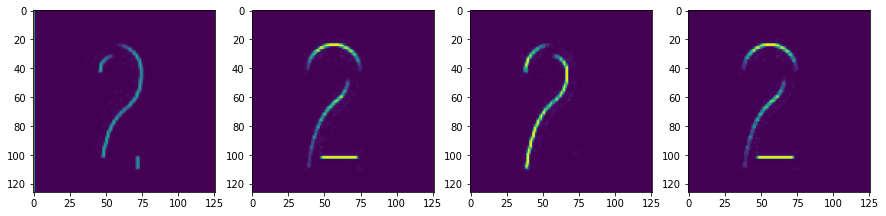

after conv


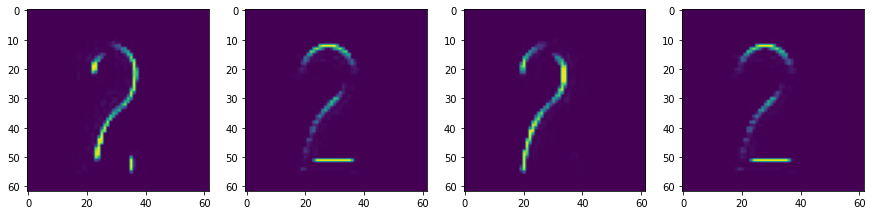

after conv


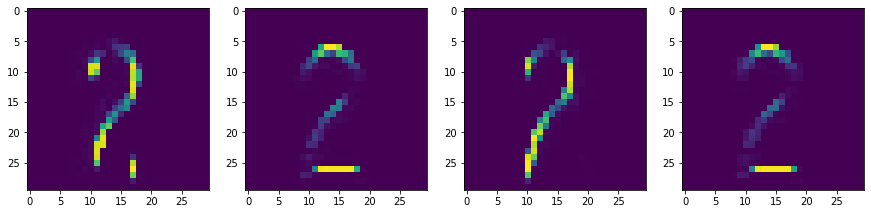

after conv


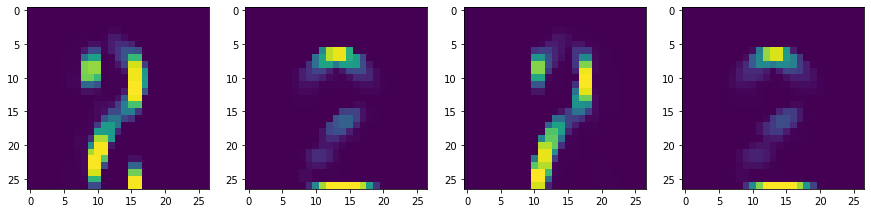

after conv


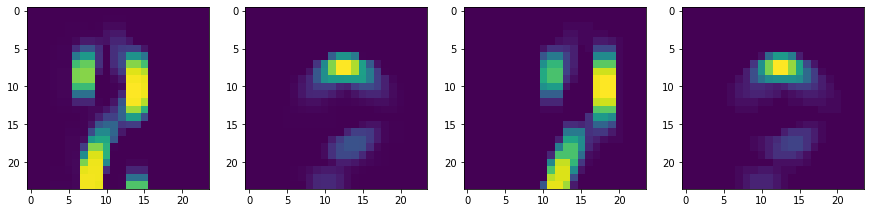

after conv


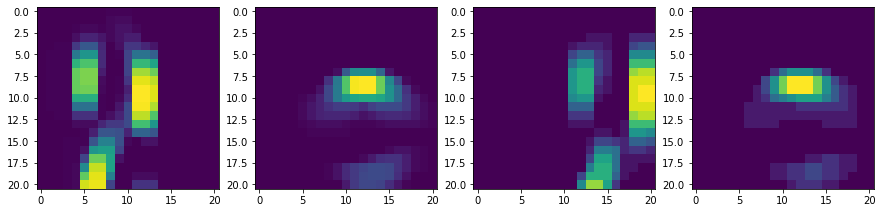

(21, 21)
feature_vector
 (441,)


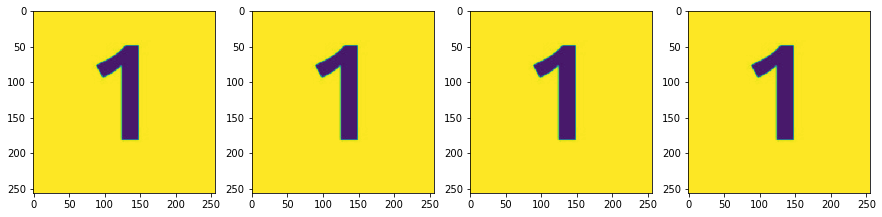

after conv


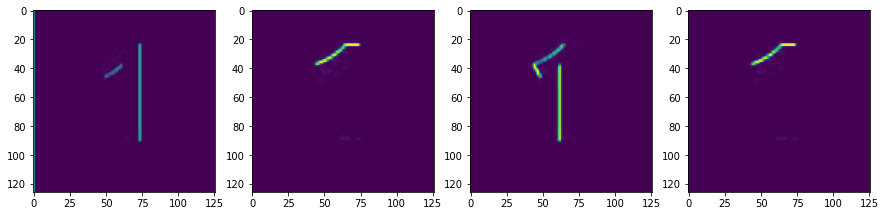

after conv


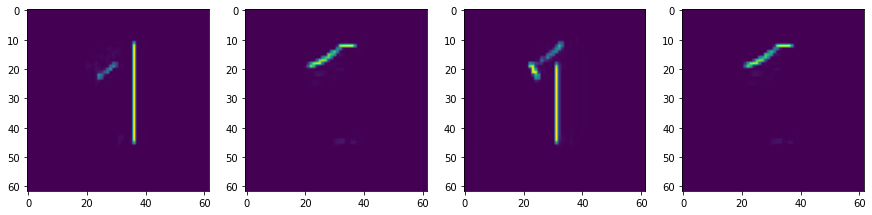

after conv


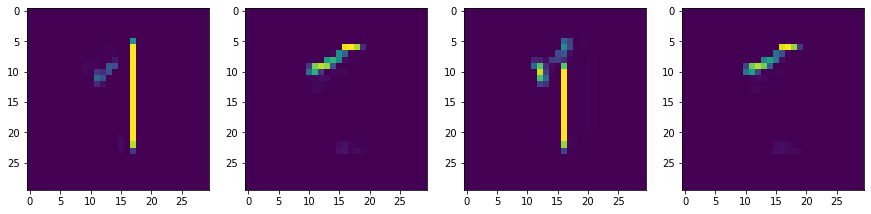

after conv


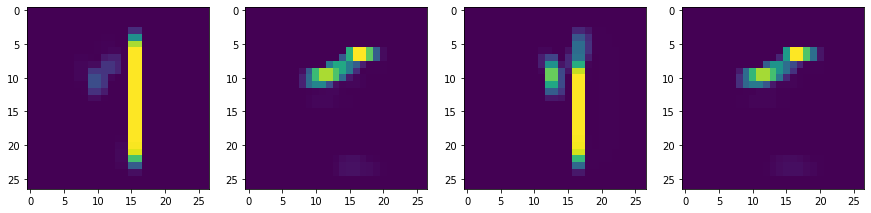

after conv


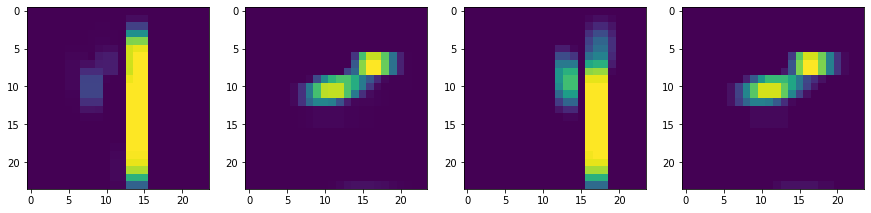

after conv


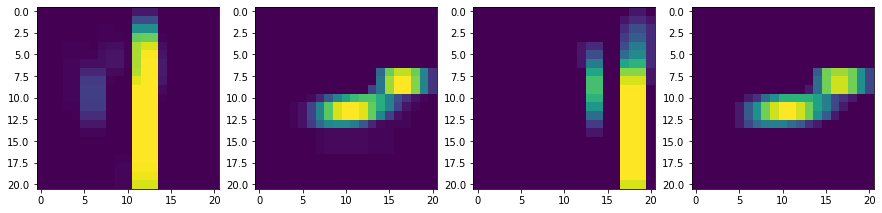

(21, 21)
feature_vector
 (441,)


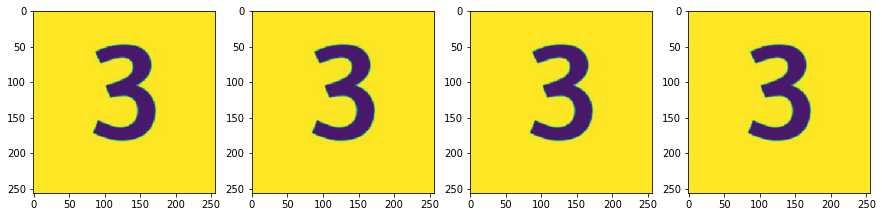

after conv


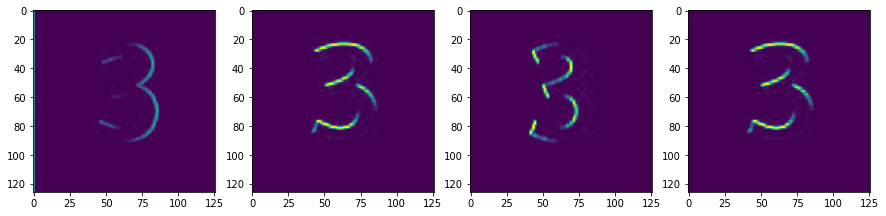

after conv


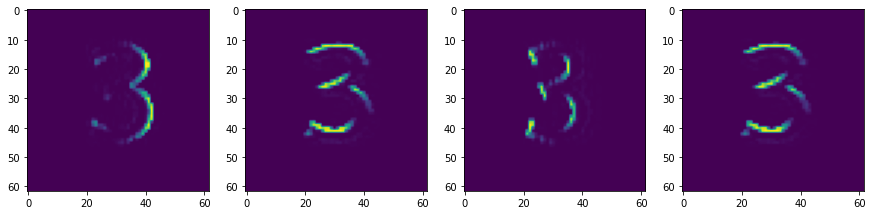

after conv


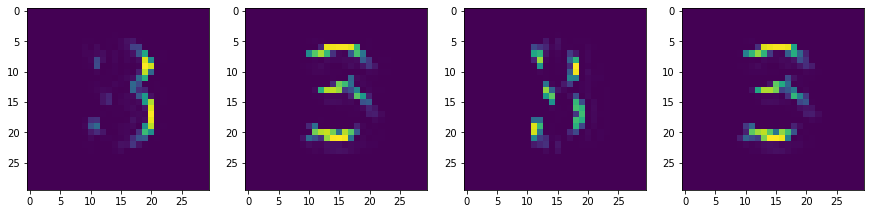

after conv


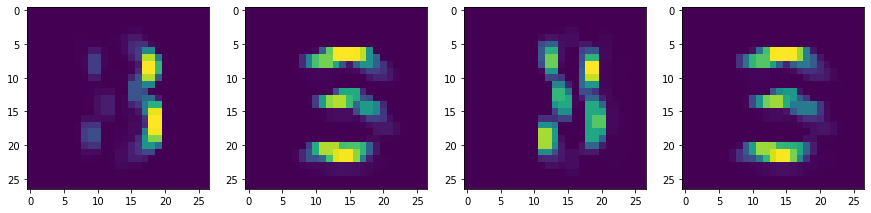

after conv


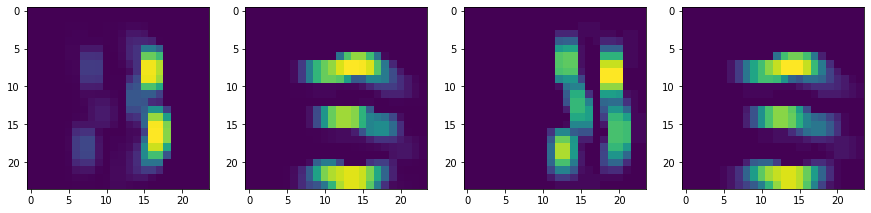

after conv


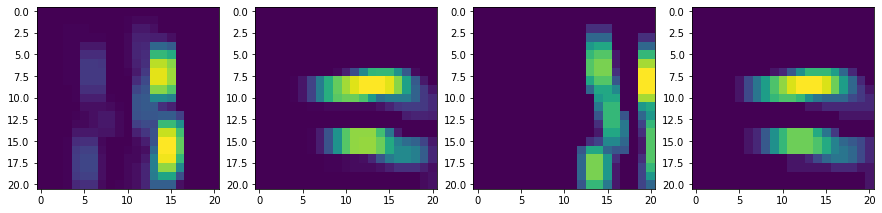

(21, 21)
feature_vector
 (441,)


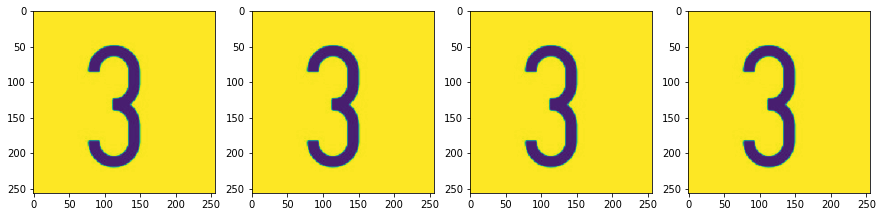

after conv


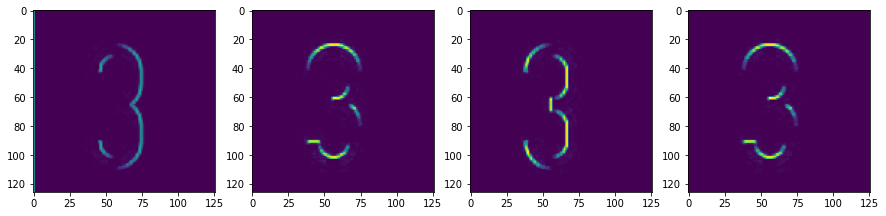

after conv


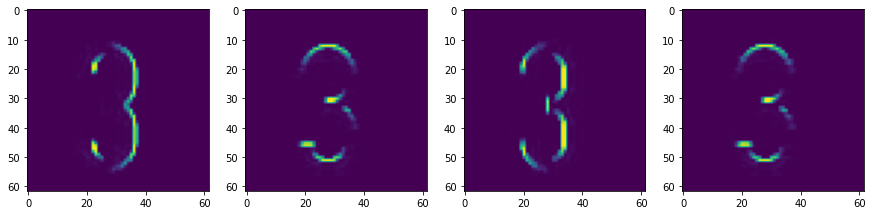

after conv


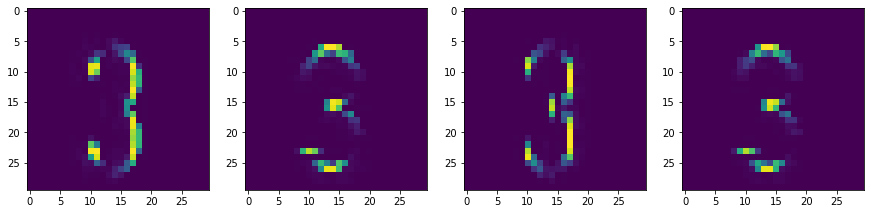

after conv


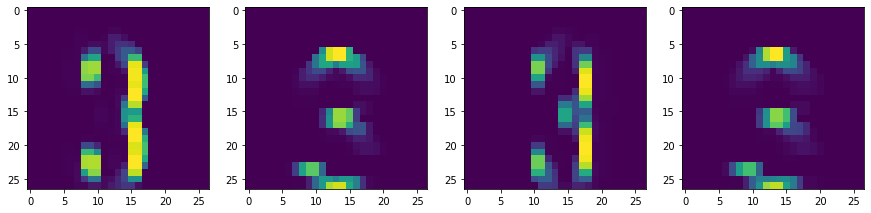

after conv


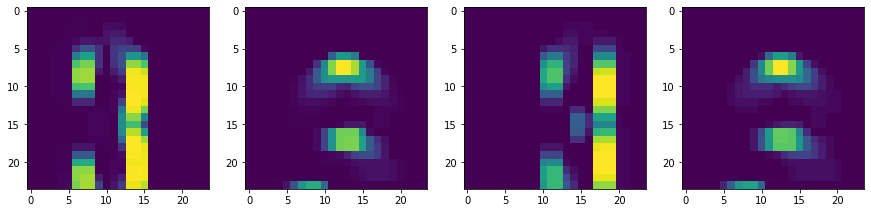

after conv


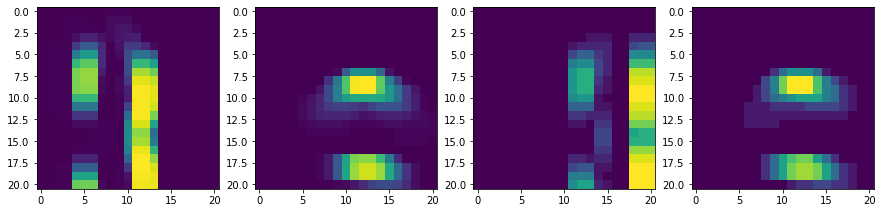

(21, 21)
feature_vector
 (441,)


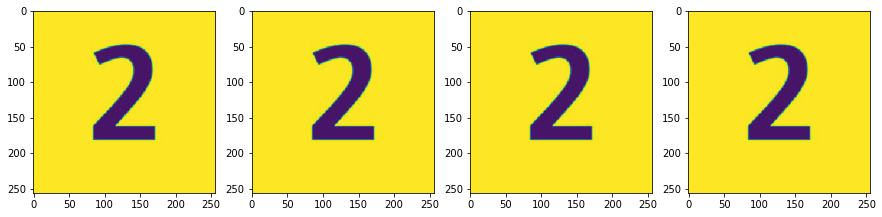

after conv


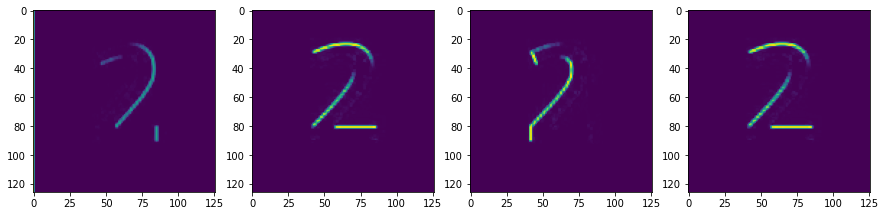

after conv


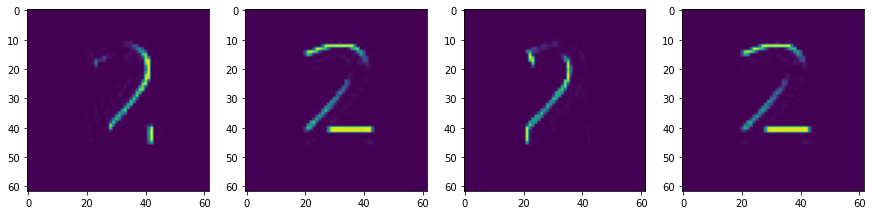

after conv


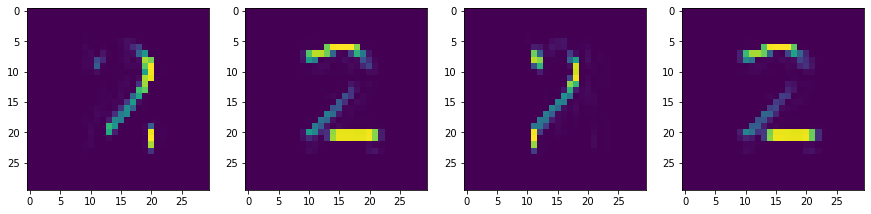

after conv


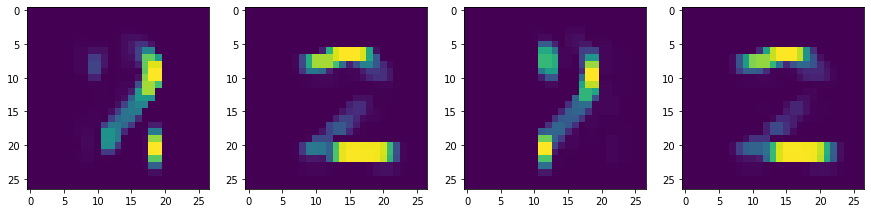

after conv


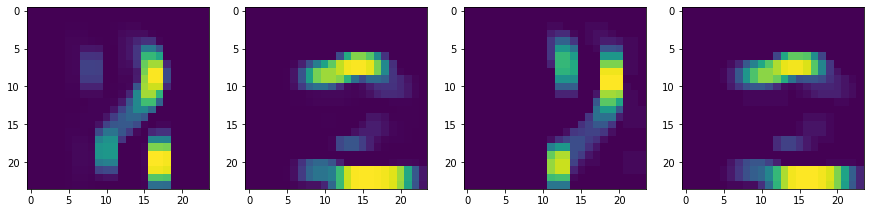

after conv


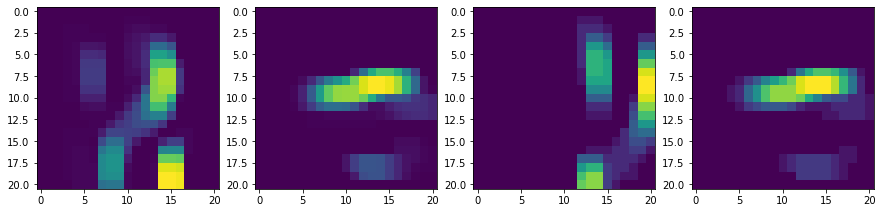

(21, 21)
feature_vector
 (441,)


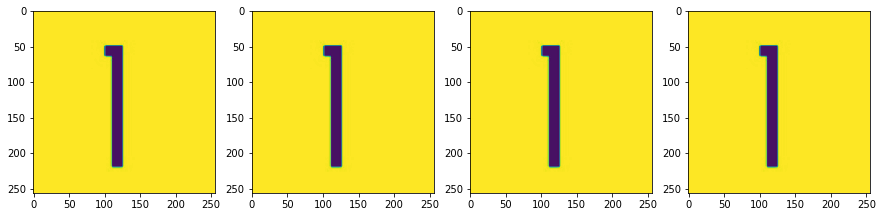

after conv


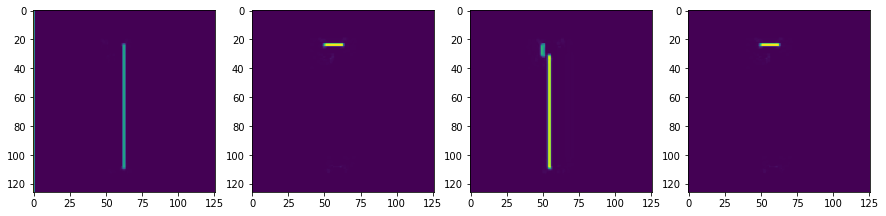

after conv


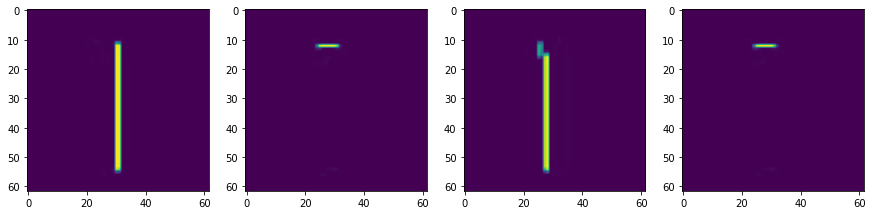

after conv


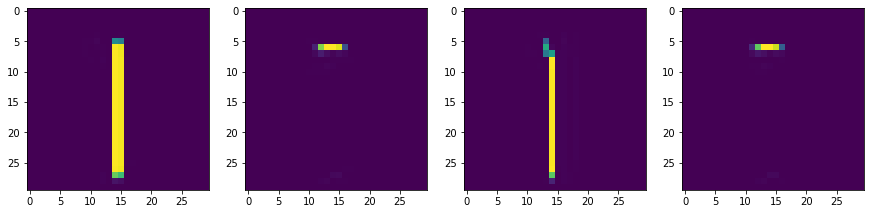

after conv


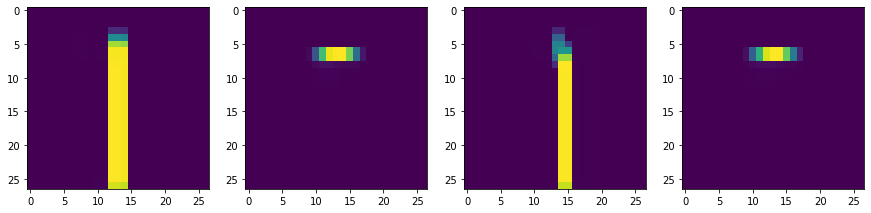

after conv


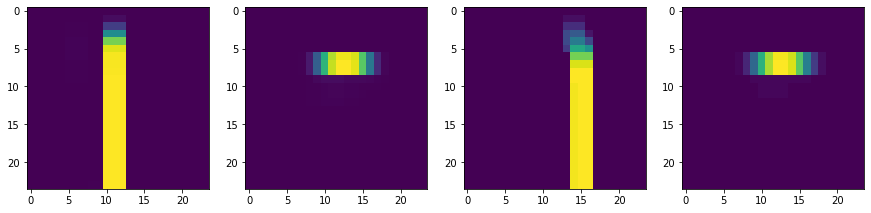

after conv


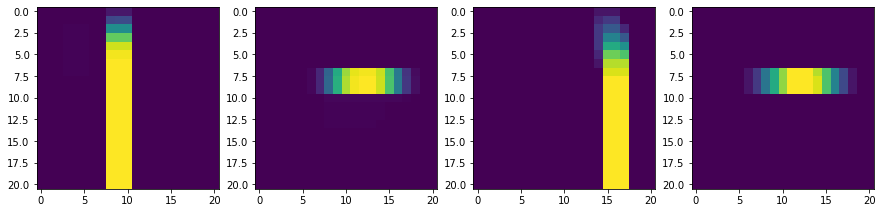

(21, 21)
feature_vector
 (441,)


In [237]:
train_path = '/opt/amarnath/aicopia/dataset/digits/training/'
class_list = ['1', '2', '3']
to_display = True
label_dic = {'1':[1, 0, 0], '2':[0, 1, 0], '3':[0, 0, 1]}
label_list = []
file_name_list = {}
feature_list = []

for file_name in (os.listdir(train_path)):
    label = file_name.split("_")[0] 

    image_path = train_path+file_name

    original_image = cv2.imread(image_path)

    original_image = cv2.resize(original_image, (256, 256),  interpolation = cv2.INTER_NEAREST) 
    image_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    feat_ext = FeatureExtraction(image_gray, filters, height, width, filter_height, filter_width, filter_count, to_display)
    feature_vector = feat_ext.extract()
    
    print("feature_vector\n", feature_vector[0].shape)
    feature_list.append(np.array(feature_vector))
    label_list.append(label_dic[label])

# print(feature_list)
# print(label_list)

In [238]:
print(len(feature_vector[0]))
print(len(feature_list[0][0]))


441
441


(441,)


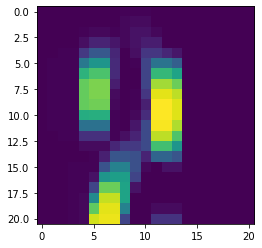

(441,)


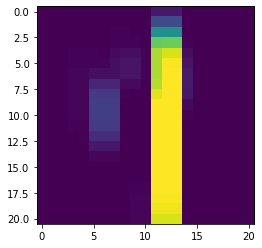

(441,)


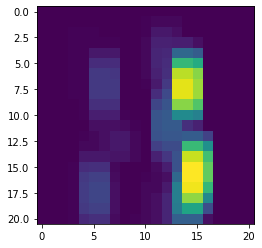

(441,)


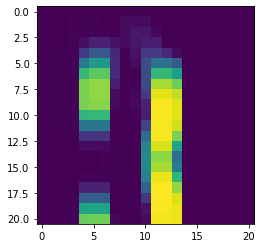

(441,)


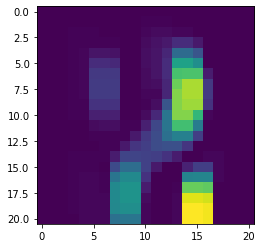

(441,)


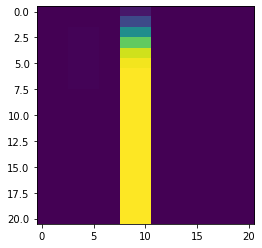

In [239]:
# visualizing the data, ploting first filter. 
for feat in feature_list:
    print(feat[0].shape)
    plt.imshow(np.array(feat[0]).reshape(21, 21)) 
    plt.show() 

In [240]:
class Network:
    def feed_forward(self, features, weight1, weight2):
        output1 = features.dot(weight1)
        activation1 = self.sigmoid(output1)
        output2 = activation1.dot(weight2)
        activation2 = self.sigmoid(output2)
        return activation2
    def back_propogation(self, features, labels, weight1, weight2, alpha):
        output1 = features.dot(weight1)
        activation1 = self.sigmoid(output1)
        output2 = activation1.dot(weight2)
        activation2 = self.sigmoid(output2)
        
        diff =(activation2-labels) 
        difference = np.multiply((weight2.dot((diff.transpose()))).transpose(), (np.multiply(activation1, 1-activation1))) 

        weight1_adj = features.transpose().dot(difference) 
        weight2_adj = activation1.transpose().dot(diff) 
        weight1 = weight1-(alpha*(weight1_adj)) 
        weight2 = weight2-(alpha*(weight2_adj)) 
        return weight1, weight2 

    def sigmoid(self, inp): 
        return (1/(1 + np.exp(-inp))) 

In [241]:
def generate_weight(m, n): 
    weights = [] 
    for i in range(m * n):
        weights.append(np.random.randn()) 
    return(np.array(weights).reshape(m, n)) 
      
def loss(out, label_predicted, labels): 
    loss_value =(np.square(out-label_predicted)) 
    loss_value = np.sum(loss_value)/len(labels) 
    return(loss_value) 

In [242]:
def train(features, labels, weight1, weight2, alpha = 0.01, epochs = 10): 
    accuracy_list = [] 
    total_loss_list = [] 
    net = Network()
    for i in range(epochs):
        loss_list = [] 
        for j in range(len(features)):
            activation = net.feed_forward(features[j], weight1, weight2)
            loss_list.append((loss(activation, labels[j], labels)))
            weight1, weight2 = net.back_propogation(features[j], labels[j], weight1, weight2, alpha)
        print("epochs:", i + 1, "accuracy:", (1-(sum(loss_list)/len(loss_list)))*100)    
        accuracy_list.append((1-(sum(loss_list)/len(features)))*100) 
        total_loss_list.append(sum(loss_list)/len(features)) 
    return accuracy_list, total_loss_list, weight1, weight2

In [243]:
def predict(feature_list, weight1, weight2, class_list, num_filters):
    net = Network()
    maximum_prob = 0
    tmp = 0

    for feature in feature_list:
#         print("feature", feature)
        activation = net.feed_forward(np.array([feature]), weight1, weight2)
        for i in range(len(activation[0])): 
            if(maximum_prob < activation[0][i]): 
                maximum_prob = activation[0][i] 
                tmp = i
        print("Intermediate Prediction ", class_list[tmp])
    print("Final Image is of ", class_list[tmp])
#     plt.imshow(feature.reshape(21, 21)) 
#     plt.show()

In [244]:
weight1 = generate_weight(441, 100) 
weight2 = generate_weight(100, 3) 

In [245]:
accuracy_list, total_loss_list, weight1, weight2 = train(feature_list, label_list, weight1, weight2, 0.01, 500)


epochs: 1 accuracy: 28.38907618645008
epochs: 2 accuracy: 42.93592652533517
epochs: 3 accuracy: 48.7454002111659
epochs: 4 accuracy: 50.92420453354516
epochs: 5 accuracy: 52.124711937129156
epochs: 6 accuracy: 54.84228129185871
epochs: 7 accuracy: 58.20752584120357
epochs: 8 accuracy: 61.47660412290501
epochs: 9 accuracy: 64.18635100752343
epochs: 10 accuracy: 66.33902653377852
epochs: 11 accuracy: 68.09255387489901
epochs: 12 accuracy: 69.56193457294115
epochs: 13 accuracy: 70.81756019176201
epochs: 14 accuracy: 71.9055520203911
epochs: 15 accuracy: 72.8589860073322
epochs: 16 accuracy: 73.70320956028785
epochs: 17 accuracy: 74.45850996274497
epochs: 18 accuracy: 75.14162751845872
epochs: 19 accuracy: 75.76672730395181
epochs: 20 accuracy: 76.34607152752471
epochs: 21 accuracy: 76.89047553788755
epochs: 22 accuracy: 77.40955801110756
epochs: 23 accuracy: 77.91176557387519
epochs: 24 accuracy: 78.40415767911703
epochs: 25 accuracy: 78.89198709536652
epochs: 26 accuracy: 79.378204501574

epochs: 270 accuracy: 97.3190486457352
epochs: 271 accuracy: 97.33156399389553
epochs: 272 accuracy: 97.34398587602632
epochs: 273 accuracy: 97.35631525666791
epochs: 274 accuracy: 97.3685530878945
epochs: 275 accuracy: 97.38070030950516
epochs: 276 accuracy: 97.39275784921155
epochs: 277 accuracy: 97.40472662282225
epochs: 278 accuracy: 97.41660753442392
epochs: 279 accuracy: 97.42840147655924
epochs: 280 accuracy: 97.44010933040182
epochs: 281 accuracy: 97.45173196592802
epochs: 282 accuracy: 97.46327024208574
epochs: 283 accuracy: 97.47472500696044
epochs: 284 accuracy: 97.48609709793811
epochs: 285 accuracy: 97.49738734186556
epochs: 286 accuracy: 97.50859655520784
epochs: 287 accuracy: 97.51972554420314
epochs: 288 accuracy: 97.53077510501473
epochs: 289 accuracy: 97.54174602388068
epochs: 290 accuracy: 97.5526390772607
epochs: 291 accuracy: 97.56345503198065
epochs: 292 accuracy: 97.57419464537458
epochs: 293 accuracy: 97.5848586654243
epochs: 294 accuracy: 97.5954478308967
epoch

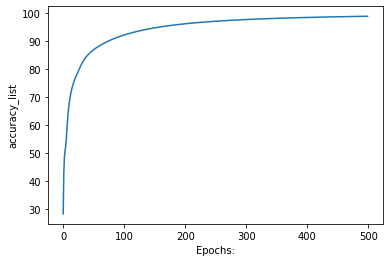

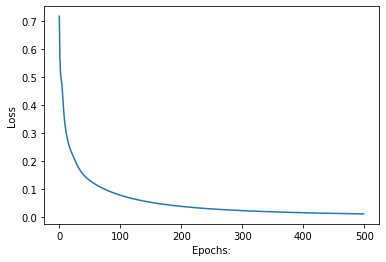

In [246]:
import matplotlib.pyplot as plt1 
  
# ploting accuraccy 
plt1.plot(accuracy_list) 
plt1.ylabel('accuracy_list') 
plt1.xlabel("Epochs:") 
plt1.show() 
  
# plotting Loss 
plt1.plot(total_loss_list) 
plt1.ylabel('Loss') 
plt1.xlabel("Epochs:") 
plt1.show()



image_path /opt/amarnath/aicopia/dataset/digits/testing/1_1.jpg


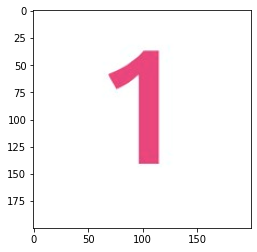

(21, 21)
Intermediate Prediction  1
Intermediate Prediction  1
Intermediate Prediction  1
Intermediate Prediction  1
Final Image is of  1


image_path /opt/amarnath/aicopia/dataset/digits/testing/3_1.jpg


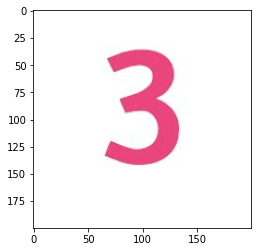

(21, 21)
Intermediate Prediction  3
Intermediate Prediction  3
Intermediate Prediction  3
Intermediate Prediction  3
Final Image is of  3


image_path /opt/amarnath/aicopia/dataset/digits/testing/2_1.jpg


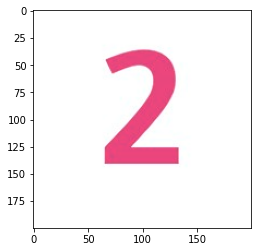

(21, 21)
Intermediate Prediction  2
Intermediate Prediction  2
Intermediate Prediction  2
Intermediate Prediction  2
Final Image is of  2


In [255]:
num_filters = 4
to_display = False
test_path = "/opt/amarnath/aicopia/dataset/digits/testing/"
for filename in os.listdir(test_path):

    image_path = test_path+filename
    print("\n\nimage_path", image_path)
    original_image = cv2.imread(image_path)
    plt.imshow(original_image)
    plt.show()
    original_image = cv2.resize(original_image, (256, 256),  interpolation = cv2.INTER_NEAREST) 
    image_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    feat_ext = FeatureExtraction(image_gray, filters, height, width, filter_height, filter_width, filter_count, to_display)
    feature_vector = feat_ext.extract()

    predict(feature_vector, weight1, weight2, class_list, num_filters)
